## FDTD

In [1]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("..")

import nidn
import torch

11:29:03|NIDN-INFO| Initialized NIDN for cpu
11:29:03|NIDN-INFO| Using double precision


## Single layer TiO2

Configuring the simulation

In [2]:
cfg = nidn.load_default_cfg()
# Set the number of frequencies to simulate for
cfg.N_freq = 30
#Number of layers with materials
cfg.N_layers = 1
# Define the thickness of each layer
cfg.PER_LAYER_THICKNESS=[0.3]
#Smallest wavelength
cfg.physical_wavelength_range[0]=3e-7
#Largest wavelength
cfg.physical_wavelength_range[1]=1e-6
#Convert wavelengths to normalized frequencies used by the layer builder
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution,
)
# Init layer builder
layer_builder = nidn.LayerBuilder(cfg)
#init epsiln values
eps_grid = torch.zeros(1, 1, cfg.N_layers, cfg.N_freq, dtype=torch.cfloat)
# Set first layer to titanium oxide
eps_grid[:, :, 0, :] = layer_builder.build_uniform_layer("titanium_oxide")

# Choose FDTD method, TRCWA other option
cfg.solver = "FDTD"
# Set number of time steps in FDTD
cfg.FDTD_niter = 400
# Set number of decimal in printing
torch.set_printoptions(8)
# Choose pulse type
cfg.FDTD_pulse_type = 'continuous'
nidn.set_log_level('DEBUG')
cfg.FDTD_source_type = 'line'


C:\Users\to-bo\.conda\envs\nidn\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
11:29:04|NIDN-DEBUG| Setting LogLevel to DEBUG


In [3]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)

11:29:05|NIDN-DEBUG| Using FDTD solver to find spectrum
11:29:05|NIDN-DEBUG| Wavelenghts in spectrum : 
11:29:05|NIDN-DEBUG| [1.00000000e-06 9.25531915e-07 8.61386139e-07 8.05555556e-07
 7.56521739e-07 7.13114754e-07 6.74418605e-07 6.39705882e-07
 6.08391608e-07 5.80000000e-07 5.54140127e-07 5.30487805e-07
 5.08771930e-07 4.88764045e-07 4.70270270e-07 4.53125000e-07
 4.37185930e-07 4.22330097e-07 4.08450704e-07 3.95454545e-07
 3.83259912e-07 3.71794872e-07 3.60995851e-07 3.50806452e-07
 3.41176471e-07 3.32061069e-07 3.23420074e-07 3.15217391e-07
 3.07420495e-07 3.00000000e-07]
11:29:05|NIDN-DEBUG| Number of layers: 
11:29:05|NIDN-DEBUG| 1
  0%|          | 0/30 [00:00<?, ?it/s]11:29:05|NIDN-DEBUG| Simulating for wavelenght: 1e-06
11:29:05|NIDN-DEBUG| Initializing FDTD grid with size 176 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
11:29:08|NIDN-DEBUG| Initializing FDTD grid with size 176 by 3 grid points, with a scaling factor of 33.333333333333336 gr

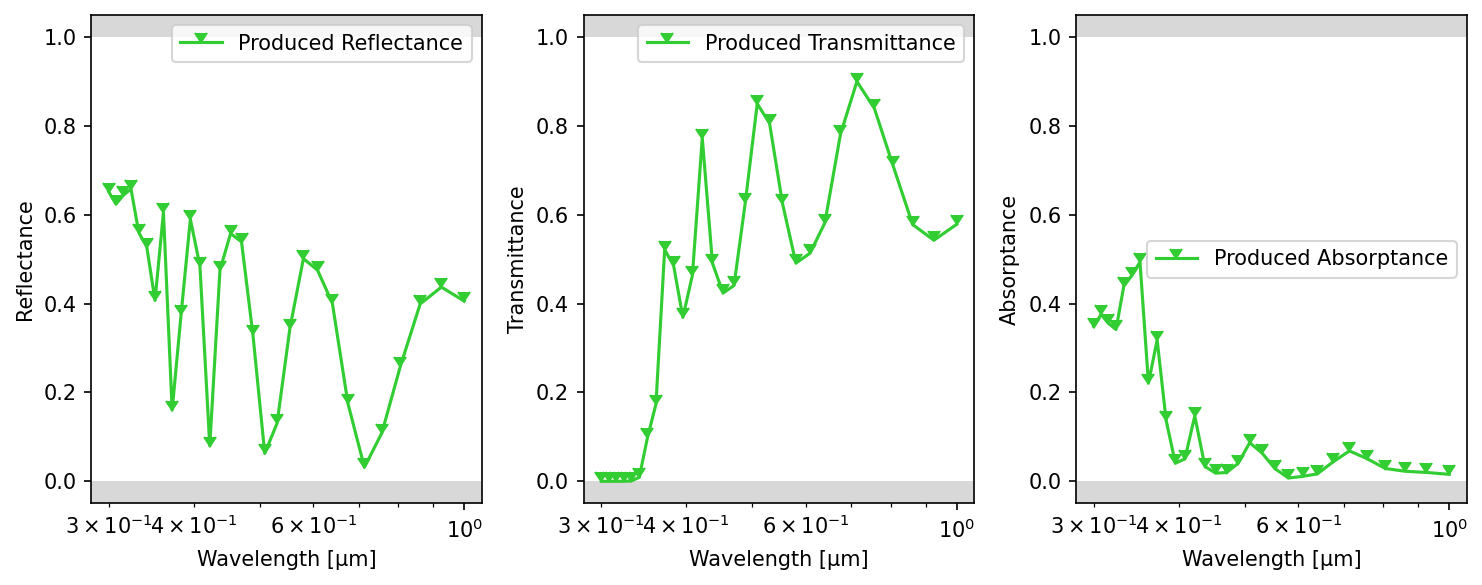

In [4]:
#Plot the spectrum
nidn.plot_spectrum(cfg,R,T)

## Multiple layers

In [17]:
cfg = nidn.load_default_cfg()
# Set the number of frequencies to simulate for
cfg.N_freq = 50
#Number of layers with materials
cfg.N_layers = 3
# Define the thickness of each layer, in default units
cfg.PER_LAYER_THICKNESS=[1.0, 0.5, 1.2]
#Smallest wavelength
cfg.physical_wavelength_range[0]=3e-7
#Largest wavelength
cfg.physical_wavelength_range[1]=9e-7
#init epsiln values
eps_grid = torch.zeros(1, 1, cfg.N_layers, cfg.N_freq, dtype=torch.cfloat)
#Convert wavelengths to normalized frequencies used by the layer builder
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution,
)
# Choose FDTD method, TRCWA other option
cfg.solver = "FDTD"
# Init layer builder
layer_builder = nidn.LayerBuilder(cfg)
# Set the three layers to the desired material
eps_grid[:, :, 0, :] = layer_builder.build_uniform_layer("titanium_oxide")
eps_grid[:, :, 1, :] = layer_builder.build_uniform_layer("gallium_arsenide")
eps_grid[:, :, 2, :] = layer_builder.build_uniform_layer("silicon_nitride")
# Set number of time steps in FDTD
cfg.FDTD_niter = 800
# Set number of decimal in printing
torch.set_printoptions(8)
# Choose pulse type
cfg.FDTD_pulse_type = 'continuous'

12:06:58|NIDN-DEBUG| Found the following files
12:06:58|NIDN-DEBUG| ['c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\aluminium_oxide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\gallium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\germanium.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\indium_arsenide.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\materials/data\\silicon_nitride.csv', 'c:\\Users\\to-bo\\OneDrive\\Documents\\ESA\\NIDN\\Developer\\notebooks\\..\\nidn\\m

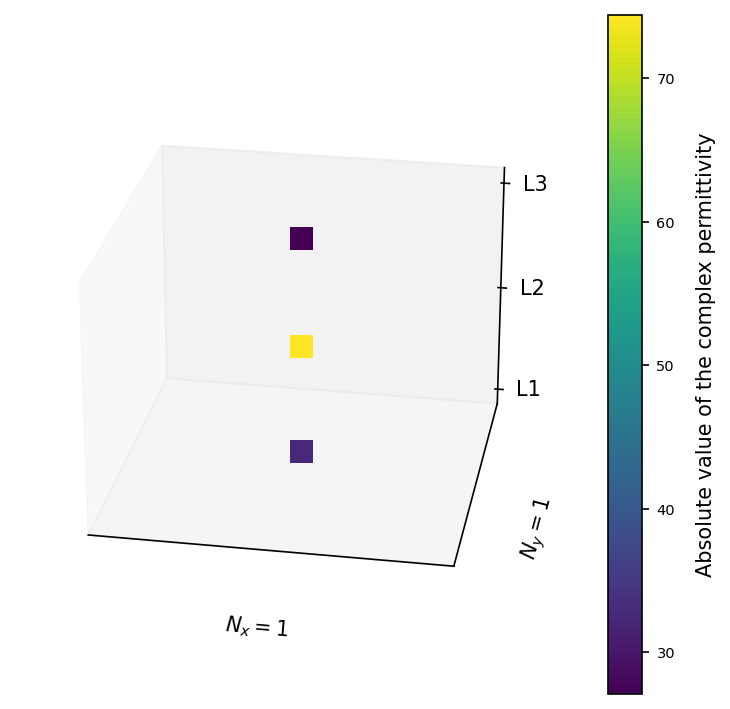

In [9]:
# Plot the abs values of the produced grid
nidn.plot_epsilon_grid(eps_grid,cfg)

12:24:49|NIDN-DEBUG| Using FDTD solver to find spectrum
12:24:49|NIDN-DEBUG| Wavelenghts in spectrum : 
12:24:49|NIDN-DEBUG| [6.00000000e-07 4.80000000e-07 4.00000000e-07 3.42857143e-07
 3.00000000e-07]
12:24:49|NIDN-DEBUG| Number of layers: 
12:24:49|NIDN-DEBUG| 3
  0%|          | 0/5 [00:00<?, ?it/s]12:24:49|NIDN-DEBUG| Simulating for wavelenght: 6e-07
12:24:49|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:24:54|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um


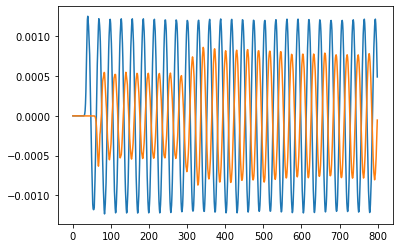

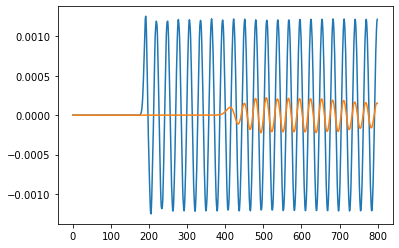

12:24:59|NIDN-DEBUG| [413 450 480 508 537 566 595 624 653 682 711 740 769 798]
 20%|██        | 1/5 [00:10<00:40, 10.04s/it]12:24:59|NIDN-DEBUG| Simulating for wavelenght: 4.8e-07
12:24:59|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:25:03|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um


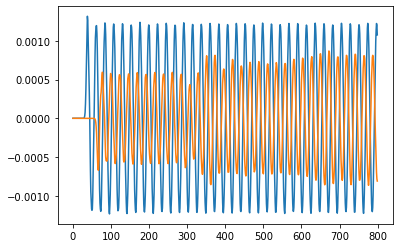

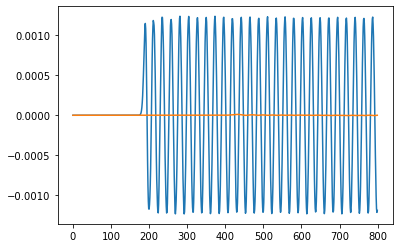

12:25:09|NIDN-DEBUG| [432 470 498 524 548 572 595 618 641 663 688 709 733 756 779]
 40%|████      | 2/5 [00:20<00:30, 10.02s/it]12:25:09|NIDN-DEBUG| Simulating for wavelenght: 4e-07
12:25:09|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:25:14|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um


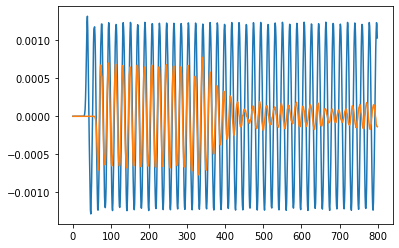

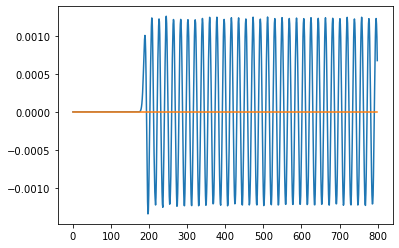

12:25:19|NIDN-DEBUG| [664]
 60%|██████    | 3/5 [00:30<00:20, 10.07s/it]12:25:19|NIDN-DEBUG| Simulating for wavelenght: 3.428571428571428e-07
12:25:19|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:25:24|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um


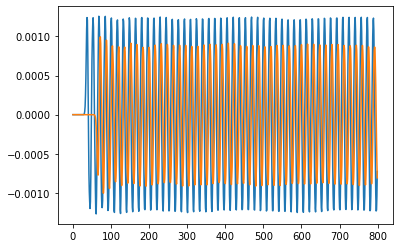

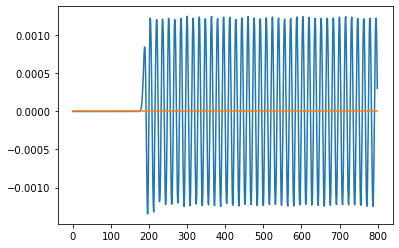

12:25:30|NIDN-DEBUG| [758]
 80%|████████  | 4/5 [00:41<00:10, 10.40s/it]12:25:30|NIDN-DEBUG| Simulating for wavelenght: 3e-07
12:25:30|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um
12:25:35|NIDN-DEBUG| Initializing FDTD grid with size 256 by 3 grid points, with a scaling factor of 33.333333333333336 grid points per um


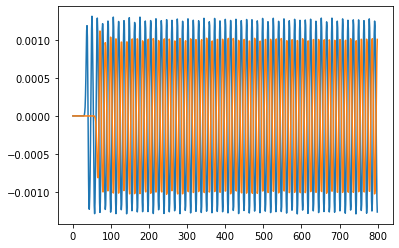

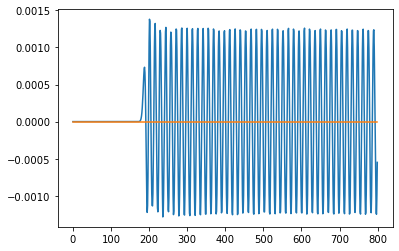

12:25:42|NIDN-DEBUG| [348 351 368 372 376 380]
100%|██████████| 5/5 [00:53<00:00, 10.60s/it]
12:25:42|NIDN-DEBUG| Trasmission spectrum
12:25:42|NIDN-DEBUG| [tensor(0.02514224), tensor(9.34442859e-06), tensor(1.54034303e-08), tensor(2.09255885e-09), tensor(7.00565062e-28)]
12:25:42|NIDN-DEBUG| Reflection spectrum
12:25:42|NIDN-DEBUG| [tensor(0.35842872), tensor(0.33398193), tensor(0.13476233), tensor(0.51066676), tensor(0.65151012)]


In [28]:
# Compute spectrum for this configuration
R,T = nidn.compute_spectrum(eps_grid,cfg)

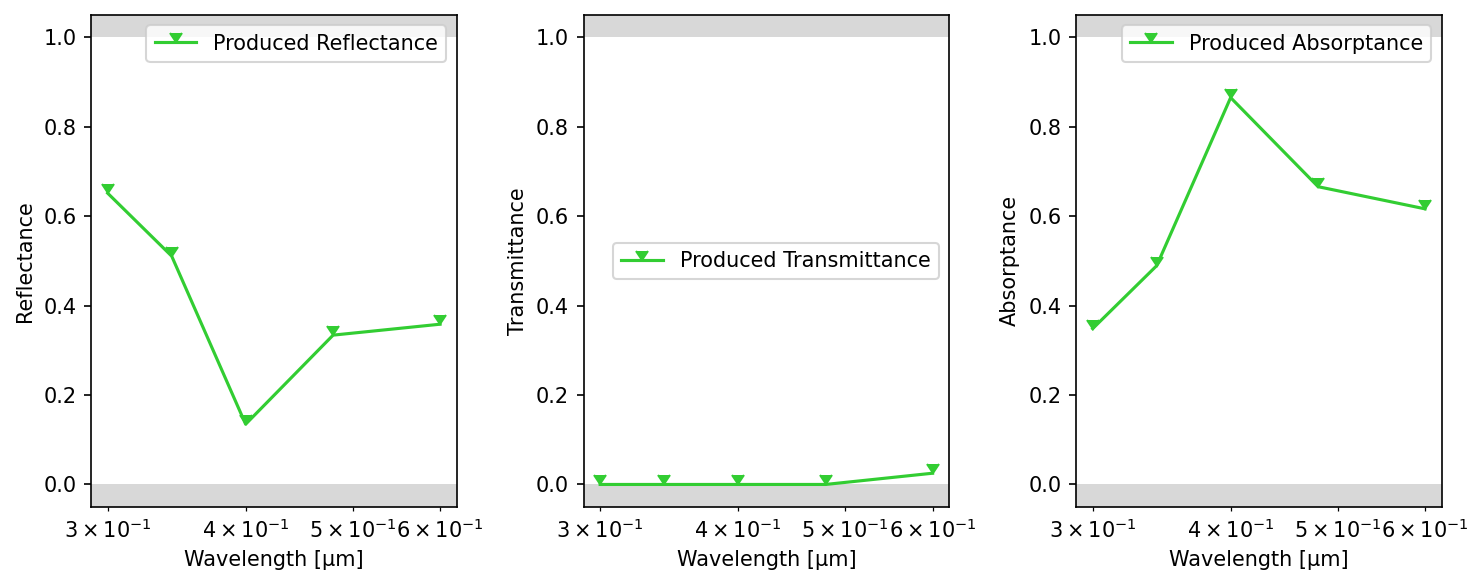

In [29]:
#Plot the spectrum
nidn.plot_spectrum(cfg,R,T)